## Project Work

The code below works but is not what we will use since it is missing collumns we need.


In [1]:
import numpy as np
import pandas as pd 
import os
import scipy.io
import matplotlib.pyplot as plt


In [5]:

# Set the path to your directory containing .mat files
mat_dir = 'matFiles'  
output_dir = 'data'  # Folder to save .npz files
os.makedirs(output_dir, exist_ok=True) #make directory

# Loop over all .mat files in the directory
for filename in os.listdir(mat_dir):
    if filename.endswith('.mat'):
        mat_path = os.path.join(mat_dir, filename)
        try:
            # Load .mat file
            mat_data = scipy.io.loadmat(mat_path)

            # Extract variables (if they exist)
            spike = mat_data.get('spike', None)
            wave = mat_data.get('wave', None)

            if spike is not None and wave is not None:
                # Construct .npz file name
                base_name = os.path.splitext(filename)[0]
                npz_path = os.path.join(output_dir, f'{base_name}.npz')

                # Save both arrays to .npz
                np.savez(npz_path, spike=spike, wave=wave)
                print(f"Saved: {npz_path}")
            else:
                print(f"Skipping {filename} — missing 'spike' or 'wave'")
        except Exception as e:
            print(f"Error loading {filename}: {e}")


Saved: data/pa19040219epr25cSPK02a.npz
Saved: data/pa05090618epr25bSPK12a.npz
Saved: data/pa13030119epr25cSPK05a.npz
Saved: data/pa19032719epr25cSPK01a.npz
Saved: data/pa17031219epr25aSPK03a.npz
Saved: data/pa17032519epr25aSPK12a.npz
Saved: data/pa16022519epr25aSPK16a.npz
Saved: data/pa02082918epr25aSPK15b.npz
Saved: data/pa19031919epr25cSPK13a.npz
Saved: data/pa21040819epr25aSPK15a.npz
Saved: data/pa13031919epr25cSPK12a.npz
Saved: data/pa02090718epr25aSPK04a.npz
Saved: data/pa18032119epr25aSPK10a.npz
Saved: data/pa17040919epr25aSPK12a.npz
Saved: data/pa16032619epr25aSPK11a.npz
Saved: data/pa18022719epr25aSPK01b.npz
Saved: data/pa18022719epr25aSPK01c.npz
Saved: data/pa09100218epr25cSPK13a.npz
Saved: data/pa17032619epr25aSPK03a.npz
Saved: data/pa19040619epr25cSPK15a.npz
Saved: data/pa05091318epr25bSPK11a.npz
Saved: data/pa13032319epr25cSPK01a.npz
Saved: data/pa02090418epr25aSPK15a.npz
Saved: data/pa19032819epr25cSPK13b.npz
Saved: data/pa21040219epr25aSPK11a.npz
Saved: data/pa13031319epr

In [6]:

# Load one file
sample_npz = np.load('./data/pa02083018epr25aSPK07a.npz')

# List variable names
print("Variables stored:", sample_npz.files)

# View the shape of each array
print("spike shape:", sample_npz['spike'].shape)
print("wave shape:", sample_npz['wave'].shape)

Variables stored: ['spike', 'wave']
spike shape: (11748, 1)
wave shape: (32, 1)


In [7]:
spike_times = sample_npz['spike'].squeeze()
wave_times = sample_npz['wave'].squeeze()
print(spike_times)
print(wave_times)

[ 813.581725  813.607925  813.64395  ... 4384.4573   4384.471575
 4384.573925]
[ 9.83648979e-03  1.46240712e-02  2.13433416e-02  2.98239449e-02
  3.94740769e-02  4.21165438e-02  2.62601837e-02 -2.83298096e-03
 -2.98023321e-02 -4.55803980e-02 -4.93519218e-02 -4.46010196e-02
 -3.60577602e-02 -2.70954946e-02 -1.93234873e-02 -1.32451692e-02
 -8.74785286e-03 -5.61743721e-03 -3.47575161e-03 -1.94379412e-03
 -8.47883682e-04 -7.77746245e-05  4.62179733e-04  7.55665941e-04
  9.82028025e-04  1.15700794e-03  1.31531073e-03  1.43121934e-03
  1.53736066e-03  1.59596439e-03  1.64672311e-03  1.73255055e-03]


## Code for transfering relevent data from cube.mat into a .npz we can use.

In [1]:

# lets extract and save everything as one .npz file
# cube.mat contains the researchers compiled data in the .mat format.


def load_mat_file(filepath): # use scipy to open .mat file and extract relevent data.
    """Load a .mat file and return the VPcube structure."""
    mat_contents = scipy.io.loadmat(filepath, simplify_cells=True)
    return mat_contents['cube']

def extract_all_fields(cube):
    """Extract all relevant fields from the VPcube MATLAB structure."""
    return {
        'fire': cube.get('fire'),  # firing data (z-scored, diff, raw, etc.)
        'cer': cube.get('cer'),    # suppression ratios
        'poke': cube.get('poke'),  # nose poke behavior
        'name': cube.get('name'),  # neuron/session identifiers
        'wave': cube.get('wave'),  # waveform shape
        'half_duration': cube.get('halfduration'),
        'amplitude_ratio': cube.get('amplituderatio'),
        'tag': cube.get('tag')     # tag metadata
    }

def save_to_npz(output_path, data_dict):
    """Save all extracted fields to a compressed .npz file."""
    np.savez_compressed(output_path, **data_dict)
    return output_path

# Run the extraction and save process using the uploaded file
# if it doesnt work, mess around with the file paths.
file_path = '/cube.mat'
cube = load_mat_file(file_path)
full_data = extract_all_fields(cube)
output_file = '/FearDecoding/full_dataset.npz'
saved_path = save_to_npz(output_file, full_data)

saved_path

FileNotFoundError: [Errno 2] No such file or directory: '/cube.mat'

In [2]:
# checking for correct column transfer
data = np.load("full_dataset.npz", allow_pickle=True)
#print(data.files)
fire = data['fire']

print(fire.shape) # not gonna show up since it is multi-dimensional
print(type(fire))  # is it a list, dict, or object array?

# Tried indexing it
#print(fire[0])  #  first element
#print(type(fire[0]))  # See what it contains


()
<class 'numpy.ndarray'>


In [3]:
fire_raw = fire.item()  # Unwraps the real object inside

print(type(fire_raw))
try:
    print(fire_raw.shape)
except:
    print("No shape, maybe a list with length:", len(fire_raw))


<class 'dict'>
No shape, maybe a list with length: 5


In [13]:
print(fire_raw.keys())
zscore_data = fire_raw['z']
print(type(zscore_data))
print(np.shape(zscore_data)) # not the end of the pipleline
print(zscore_data.keys()) # new set of columns


dict_keys(['CV', 'CS', 'raw', 'diff', 'z'])
<class 'dict'>
()
dict_keys(['s1', 'ms500', 'ms250', 'ms100'])


In [16]:
firing_matrix = zscore_data['ms250']
print(type(firing_matrix))
print(firing_matrix.keys())

firing_matrix = zscore_data['ms250']['pellet']
print(type(firing_matrix))
print(np.shape(firing_matrix))  # should be (trials, time_bins, neurons)


<class 'dict'>
dict_keys(['interval', 'pellet', 'itiPokeCess'])
<class 'numpy.ndarray'>
(50, 16, 435)


In [18]:
X = firing_matrix.mean(axis=1)  # shape = (50, 435)
print("firing_matrix shape:", firing_matrix.shape)
print("Min:", firing_matrix.min(), "Max:", firing_matrix.max(), "Mean:", firing_matrix.mean())

firing_matrix shape: (50, 16, 435)
Min: -3.7104991091575745 Max: 8.572225825946308 Mean: -5.027906571290939e-19


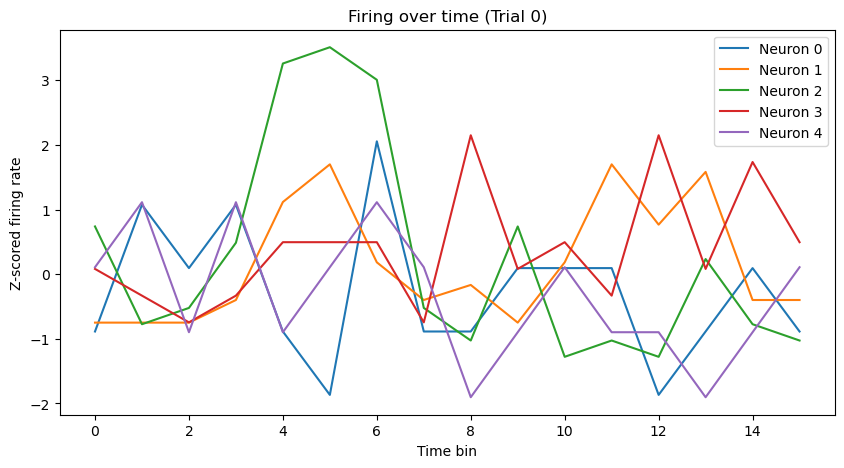

In [21]:

trial_idx = 0  # or any index 0–49
plt.figure(figsize=(10, 5))
for neuron in range(5):  # plot the first 5 neurons (of 435)
    plt.plot(firing_matrix[trial_idx, :, neuron], label=f"Neuron {neuron}")
plt.title("Firing over time (Trial 0)")
plt.xlabel("Time bin")
plt.ylabel("Z-scored firing rate")
plt.legend()
plt.show() # very cool! 
